# **Regresión Lineal Simple 1**

La regresión lineal es un método estadístico que se utiliza para modelar la relación entre una variable dependiente y una independiente. La regresión lineal busca encontrar una recta que mejor se ajusta a los datos.

La ecuación de la regresión lineal simple

y: es la variable dependiente (a predecir)
x: variable independiente (para predecir)
m: pendiente de la línea
b: ordenada al origen
El objetivo de la regresión lineal es encontrar los coeficientes m y b que minimizan la suma de los cuadrados de las diferencias entre las observaciones reales y las predicciones de la línea.

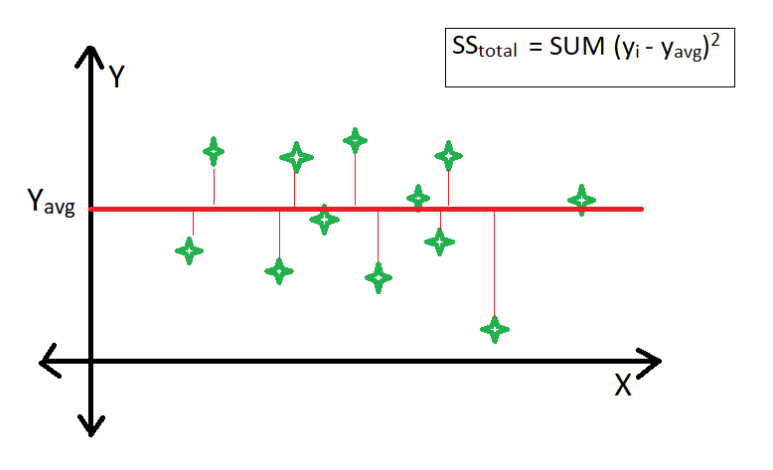

# **¿En qué momento se debe de utilizar?**
Algunas de las aplicaciones más comunes de la regresión lineal son:


*   **Predicción**: Se puede utilizar para predecir el valor de una variable dependiente. Por ejemplo, se puede utilizar para predecir el precio de una casa a partir de su tamaño o ubicación.
*   **Comparación**: Se puede utilizar para comparar el impacto de diferentes variables independientes. Por ejemplo, para comparar el impacto de la publicidad en línea y la publicidad televisiva sobre las ventas de un producto.


*   **Evaluación**: Se puede utilizar para evaluar la efectividad de una intervención. Por ejemplo, para evaluar el impacto de un programa de educación sobre el rendimiento académico de los estudiantes.


# Ventajas



1.   **Simplicidad**: Simple y fácil de implementar e interpretar.
2.   **Eficiente**: El cálculo de los coeficientes se puede realizar de manera eficiente, además de que se puede utilizar en una amplia gama de aplicaciones.






# **Desventajas**


1.  **Limitada a relaciones lineales**: Supone que la relación entre las variables es lineal.


2.   **Sensible a los valores atípicos (Outliers)**: Puede ser sensible a valores atípicos en los datos.






# **Problema**
En este problema tenemos los datos de una empresa en donde se muestran las ventas obtenidas en base a la publicidad hecha en distintos medios. El objetivo es desarrollar un algoritmo que nos sirva para encontrar cuales son los mejores para hacer publicidad que nos lleve a tener buenas ventas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Advertising.csv')

# Muestra las primeras filas del DataFrame 'data'.
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# Selecciona todas las filas y todas las columnas desde la segunda en adelante
data = data.iloc[:, 1:]
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# Muestra información sobre el DataFrame 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Utilizar el método describe() para obtener estadísticas descriptivas del DataFrame 'data'
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Obtener los nombres de las columnas del DataFrame 'data'xº
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

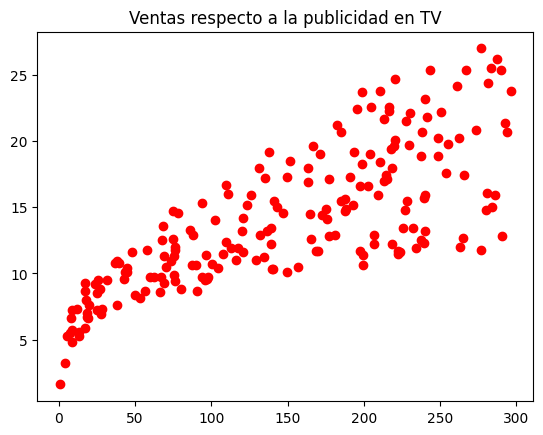

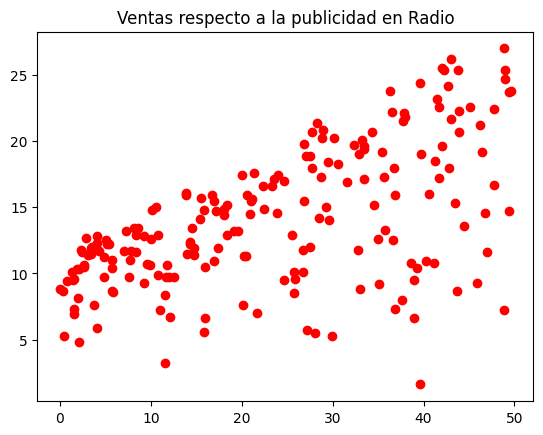

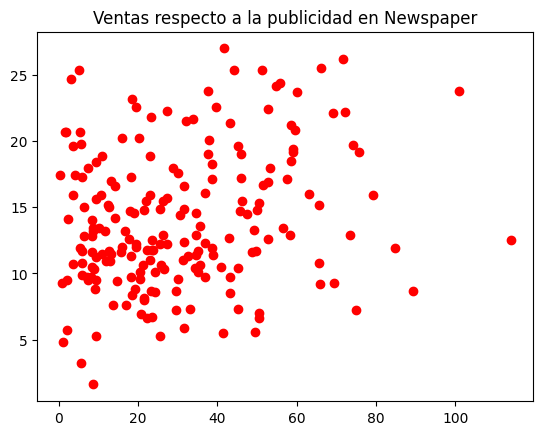

In [ ]:

# Lista de columnas a considerar en el DataFrame 'data'
cols = ['TV', 'Radio', 'Newspaper']

# Iterar sobre las columnas y crear gráficos de dispersión
for col in cols:
    # Crear un gráfico de dispersión con datos de la columna 'col' en el eje x y 'Sales' en el eje y
    plt.plot(data[col], data['Sales'], 'ro')

    # Configurar el título del gráfico, utilizando el nombre de la columna actual
    plt.title('Ventas respecto a la publicidad en %s' % col)

    # Mostrar el gráfico
    plt.show()




In [ ]:
# Importar el modelo de regresión lineal desde la biblioteca scikit-learn
from sklearn.linear_model import LinearRegression
# Importar la función train_test_split desde el módulo model_selection de la biblioteca scikit-learn (sklearn)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Obtener los valores de la columna 'TV' del DataFrame 'data' y darles forma (reshape) a un arreglo bidimensional (-1, 1)
X = data['TV'].values.reshape(-1, 1)

# Obtener los valores de la columna 'Sale' del DataFrame 'data'
y = data['Sales'].values

# Dividimos el conjunto entre el conjunto de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Imprimir la forma (dimensiones) de la matriz de características X_train
print(X_train.shape)

# Imprimir la forma (dimensiones) de la matriz de características X_test
print(X_test.shape)

(160, 1)
(40, 1)


In [ ]:
# Crear una instancia del modelo de regresión lineal
lin_reg = LinearRegression()

# Ajustar (entrenar) el modelo utilizando los datos de entrenamiento
lin_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Realizar predicciones utilizando el modelo de regresión lineal 'lin_reg' en el conjunto de prueba 'X_test'
y_pred = lin_reg.predict(X_test)


In [ ]:
y_pred

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877,
       10.61402143, 17.2072847 ,  9.44612512, 17.46785121, 15.2669948 ,
        8.58532504,  9.73460946, 18.03086098,  7.37089899, 13.61053628,
       15.03899911,  7.45930549, 16.31391381, 10.62332738, 18.16579721,
       17.79821232, 10.27435438,  8.88776831, 18.79394862, 10.33019006,
        9.60897918, 17.05373658, 13.60123034, 11.17703121,  7.51048819,
       16.41627922, 10.339496  , 16.37440246,  7.90599093, 20.18053468,
       18.203021  ,  9.36702457, 19.85482655, 12.57292322,  8.39920611])

In [ ]:
# Imprimir las predicciones y los valores reales de las primeras 4 instancias
print('Predicciones: {}, valores reales: {}'.format(y_pred[:4], y_test[:4]))

Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631], valores reales: [16.9 22.4 21.4  7.3]



El coeficiente de determinación, comúnmente denotado como R^2 (R al cuadrado), es una métrica estadística que proporciona una medida de la proporción de la varianza en la variable dependiente que es explicada por las variables independientes en un modelo de regresión. En otras palabras, R^2 indica qué tan bien las predicciones del modelo se ajustan a los datos observados.

El valor de R^2 varía entre 0 y 1. Aquí hay una interpretación general del R^2:

R^2 = 0: El modelo no explica ninguna variabilidad en la variable dependiente.
R^2 = 1: El modelo explica toda la variabilidad en la variable dependiente.
En términos más sencillos, R^2 puede interpretarse como la proporción de la variabilidad en la variable dependiente que puede explicarse por el modelo. Un R^2 más alto indica un mejor ajuste del modelo a los datos, pero no garantiza la causalidad ni la bondad del modelo para hacer predicciones fuera del conjunto de datos utilizado para entrenarlo.

La fórmula general para calcular R^2 es:


  son los valores reales de la variable dependiente.

  es la media de los valores reales.
En términos simples, R^2 compara la variabilidad explicada por el modelo (numerador) con la variabilidad total en los datos (denominador). Un valor de R^2 más cercano a 1 indica que el modelo explica una mayor proporción de la variabilidad en los datos.

La raíz del error cuadrático medio (RMSE) es una medida estadística que evalúa la precisión de las predicciones de un modelo en comparación con los valores reales. Esta métrica es comúnmente utilizada en problemas de regresión para cuantificar cuán cerca están las predicciones del modelo de los valores observados.

El RMSE se calcula como la raíz cuadrada del error cuadrático medio (MSE). El MSE es la media de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales. La raíz cuadrada se toma para asegurarse de que la métrica esté en la misma escala que la variable dependiente.

Interpretación del RMSE:

RMSE = 0: Indica que no hay errores entre las predicciones y los valores reales. Sin embargo, esto generalmente es poco realista en la práctica.
RMSE más bajo: Indica un mejor ajuste del modelo a los datos. Un valor más bajo sugiere que las predicciones son más cercanas a los valores reales.
RMSE más alto: Indica un peor ajuste del modelo. Un valor más alto sugiere que las predicciones tienen más discrepancia respecto a los valores reales.
El RMSE es sensible a los errores grandes, ya que cada diferencia al cuadrado contribuye al resultado final. Es una métrica útil para evaluar la precisión numérica de las predicciones y proporciona una comprensión de cuánto se espera que las predicciones se desvíen, en promedio, de los valores reales.

In [ ]:

# Calcular el coeficiente de determinación (R^2) del modelo 0 a 1
r_squared = lin_reg.score(X_test, y_test)

# Calcular la raíz del error cuadrático medio (RMSE) entre las predicciones y los valores reales
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(r_squared, rmse)

0.6766954295627076 3.194472431998898


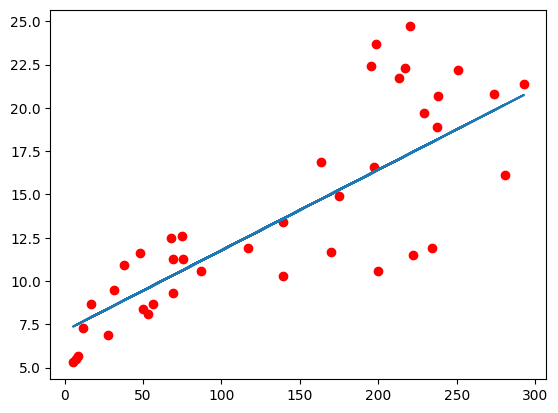

In [ ]:

# Gráfico de los datos de test contra el modelo
plt.plot(X_test, y_test, 'ro')
plt.plot(X_test, y_pred.reshape(-1,1))
plt.show()

In [ ]:
def modelos_simple(independiente):
  X = data[independiente].values.reshape(-1,1)
  y = data['Sales'].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  y_pred = lin_reg.predict(X_test)

  print('Predicciones: {}, valores reales: {}'.format(y_pred[:4], y_test[:4]))

  r_squared = lin_reg.score(X_test, y_test) # R^2
  rmse = mean_squared_error(y_test, y_pred, squared=False) #RMSE
  print('R2', r_squared, "RMSE", rmse)

  print('R2', r2_score(y_test, y_pred))

  plt.plot(X_test, y_test, 'ro')
  plt.plot(X_test, y_pred.reshape(-1,1))
  plt.show()

Predicciones: [15.88332197 19.17427219 15.20877938 16.96667826], valores reales: [16.9 22.4 21.4  7.3]
R2 0.2634309396999791 RMSE 4.8216974799471926
R2 0.2634309396999791


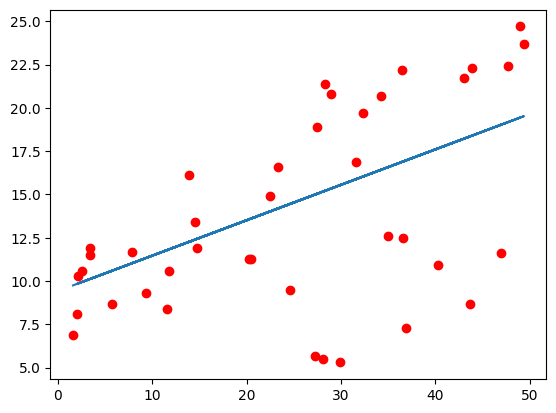

In [ ]:
# Modelo de Radio
modelos_simple('Radio')

Predicciones: [15.47167765 15.47167765 14.89203768 15.01155108], valores reales: [16.9 22.4 21.4  7.3]
R2 0.029871749149522397 RMSE 5.533600454969853
R2 0.029871749149522397


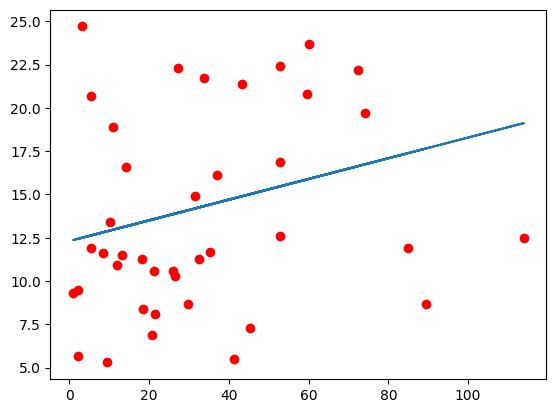

In [ ]:
# Modelo de Newspaper
modelos_simple('Newspaper')

# **Regresión Lineal Múltiple**
Es una extensión de la regresión lineal siimple, donde se busca modeloar la relación entre la variable dependiente y dos o más variables independiente.

**Ventajas y desventajas**
**Ventajas**




*   Modelo más completo: Permite modelar relaciones más complejas al considerar múltiples variables predictoras
*   Sencilla: Es una técnica relativamente sencilla de entender y utilizar


**Desventajas**


*   **Sensibilidad a Multicolinealidad:** La multicolinealidad (correlación alta entre variables predictoras) puede afectar la estabilidad de los coeficientes estimados.
*   **Puede sufrir Overfitting:** Si se incluyen demasiadas variables predictoras sin justificación, el modelo puede sobreajustarse (overfitting) a los datos de entrenamiento y tener un rendimiento deficiente en nuevos datos.





In [ ]:
import seaborn as sns

In [ ]:

# Extracción de las variables independientes y dependiente
X = data.drop(['Radio', 'Sales'], axis=1).values
y = data['Sales'].values

In [ ]:
y_pred = lin_reg.predict(X_test)
print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))

Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631], Reales: [16.9 22.4 21.4  7.3]


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
print('R2:', r2_score(y_test, y_pred))

RMSE: 3.194472431998898
R2: 0.6766954295627076


<Axes: >

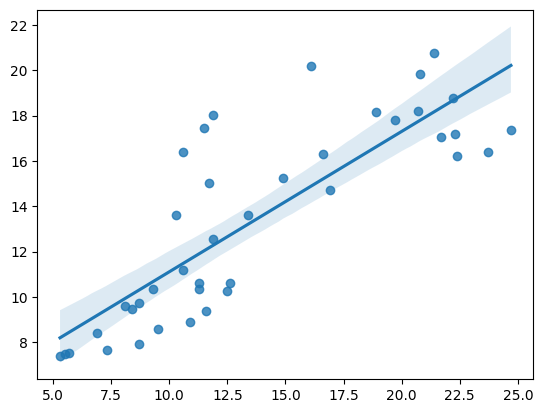

In [ ]:
sns.regplot(x = y_test, y = y_pred)

Predicciones: [16.35747252 20.86299397 21.52505848 10.58719845], Reales: [16.9 22.4 21.4  7.3]
RMSE: 1.7714254173033515
R2: 0.9005833101920356


<Axes: >

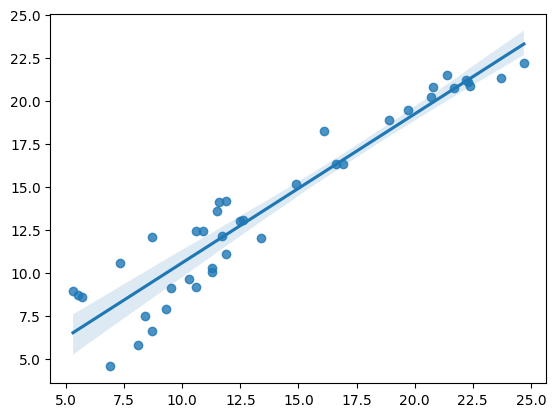

In [ ]:
X = data.drop(['Newspaper', 'Sales'], axis=1).values
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
print('R2:', r2_score(y_test, y_pred))

sns.regplot(x = y_test, y = y_pred)